In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('crime.csv', encoding='ISO-8859-11')

In [3]:
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df.shape

(319050, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [7]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

In [8]:
df.describe(include="object")

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [9]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [10]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

# Questions

### What are the most common crimes in terms of offence group?

Text(0.5, 1.0, 'Top 10 Offence Groups (as % of all crimes)')

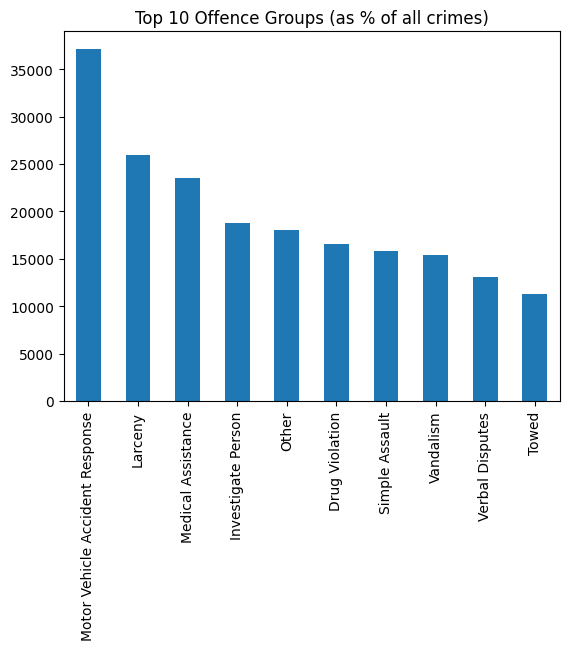

In [11]:
offenceCodeGroup = df["OFFENSE_CODE_GROUP"].value_counts().head(10)
offenceCodeGroup.plot(kind="bar")
plt.title("Top 10 Offence Groups (as % of all crimes)")              

### What are the least common offence groups??

Text(0.5, 1.0, 'Top 10 Least Offence Groups (as % of all crimes)')

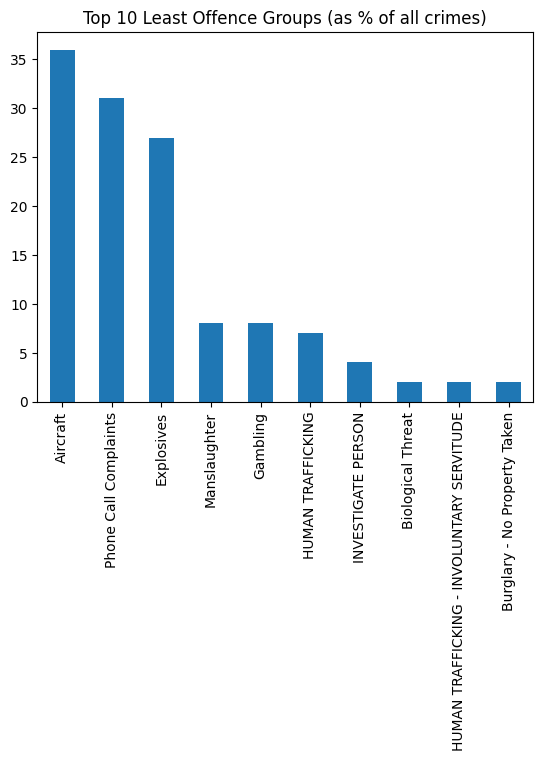

In [12]:
loffenceCodeGroup = df["OFFENSE_CODE_GROUP"].value_counts().tail(10)
loffenceCodeGroup.plot(kind="bar")
plt.title("Top 10 Least Offence Groups (as % of all crimes)")

Text(0.5, 1.0, 'Top 10 Offence Descriptions (as % of all crimes)')

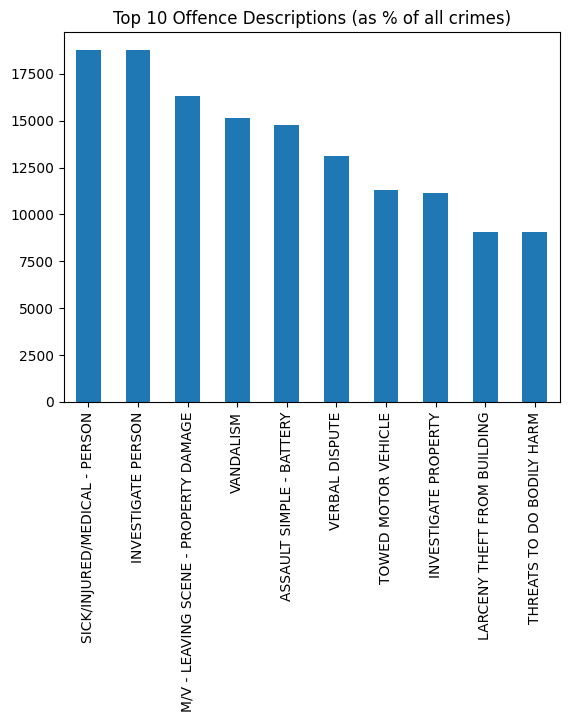

In [13]:
offenceDescription = df["OFFENSE_DESCRIPTION"].value_counts().head(10)
offenceDescription.plot(kind="bar")
plt.title("Top 10 Offence Descriptions (as % of all crimes)")

### In which years were the most crimes commited???


Text(0.5, 1.0, 'Top 5 Years with most Crime')

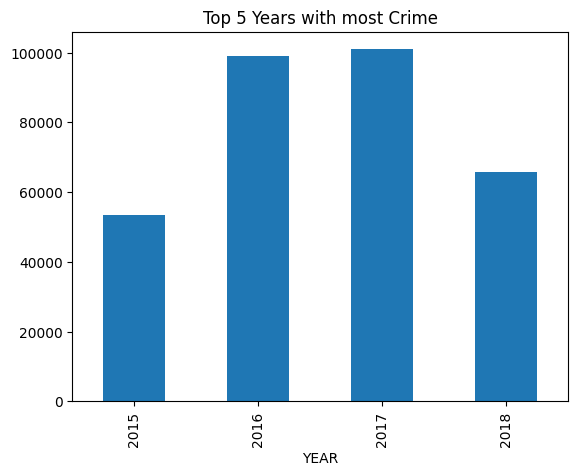

In [14]:
peakYears = df.groupby('YEAR').count()['INCIDENT_NUMBER'].head(10)
peakYears.plot(kind="bar")
plt.title("Top 5 Years with most Crime")

Text(0.5, 1.0, 'Peak Hours with most Crime')

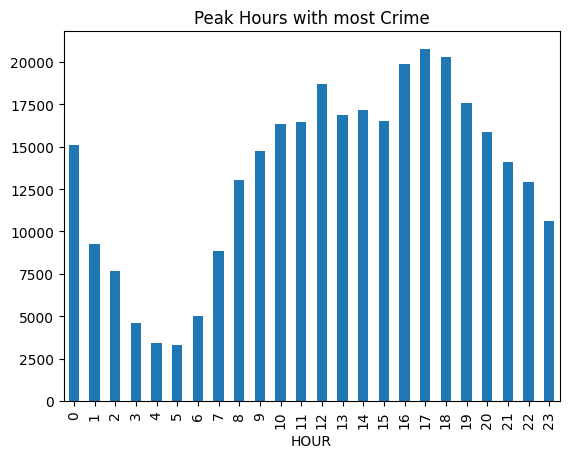

In [15]:
peakHours=df.groupby("HOUR").count()["INCIDENT_NUMBER"]
peakHours.plot(kind="bar")
plt.title("Peak Hours with most Crime")

Text(0.5, 1.0, 'Peak Days with most Crime')

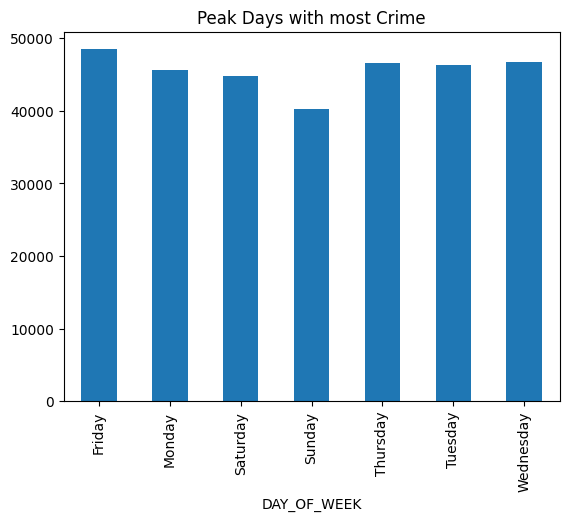

In [16]:
peakDays=df.groupby("DAY_OF_WEEK").count()["INCIDENT_NUMBER"]
peakDays.plot(kind="bar")
plt.title("Peak Days with most Crime")